1. Создайте таблицу "Hospital" с полями ID, NAME, BED_COUNT.

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных medical
    connection = get_connection("medical")
    cursor = connection.cursor()

    # Создание таблицы Patients
    create_table_query = '''
    CREATE TABLE Hospital1 (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Doctor_Id serial NOT NULL,
        Name VARCHAR (100) NOT NULL,
        Bed_Count serial,
        Experience SMALLINT
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital1' успешно создана")
    # Вставка данных в таблицу Hospital1
    insert_query = '''
    INSERT INTO Hospital1(Hospital_Id, Doctor_Id, Name, Bed_Count, Experience)
    VALUES
        (1, 101, 'Ann', 1, 5),
        (2, 102, 'Bob', 2, 3),
        (3, 103, 'Frank', 3, 2),
        (4, 104, 'Alice', 4, 6),
        (5, 105, 'Karl', 5, 4),
        (6, 106, 'Sofia', 6, 1);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Patients'")
except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'Hospital1' успешно создана
Данные успешно вставлены в таблицу 'Patients'
Соединение с PostgreSQL закрыто


2. Обновите стаж доктора с ID=102 на 5 лет.

In [11]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(Doctor_Id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Hospital1 SET Experience = %s WHERE Doctor_id = %s"""
        cursor.execute(update_query, (new_experience, Doctor_Id))
        connection.commit()

        print(f"Стаж врача с ID {Doctor_Id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Name
                          FROM Hospital1 WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (Doctor_Id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 101 на 3 года
print("Задание: Обновить стаж врачу с ID 102 на 5 лет\n")
update_experience(102, 5)

Задание: Обновить стаж врачу с ID 102 на 5 лет

Стаж врача с ID 102 успешно обновлен на 5 лет

Информация о докторе после обновления:
Doctor Id: 102
Doctor Name: Bob
Соединение с PostgreSQL закрыто


3. Обновите стаж врача с ID=103 на 3 года

In [12]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(Doctor_Id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Hospital1 SET Experience = %s WHERE Doctor_id = %s"""
        cursor.execute(update_query, (new_experience, Doctor_Id))
        connection.commit()

        print(f"Стаж врача с ID {Doctor_Id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Name
                          FROM Hospital1 WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (Doctor_Id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 101 на 3 года
print("Задание: Обновить стаж врачу с ID 103 на 3 года\n")
update_experience(103, 3)

Задание: Обновить стаж врачу с ID 103 на 3 года

Стаж врача с ID 103 успешно обновлен на 3 лет

Информация о докторе после обновления:
Doctor Id: 103
Doctor Name: Frank
Соединение с PostgreSQL закрыто


4. Получите список врачей с зарплатой больше 40000 в больнице с ID=3.

In [13]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключаемся к базе данных medical_db
database_name = 'medical'

def get_specialist_doctors_list(salary, id):
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения списка врачей по специальности и зарплате
        sql_select_query = """SELECT * FROM Doctor WHERE Salary > 4000 AND hospital_id=3"""
        cursor.execute(sql_select_query, (salary, id))
        records = cursor.fetchall()

        # Выводим информацию о врачах с указанной специальностью и зарплатой выше заданной
        print(f"Список врачей с зарплатой {salary} и специальностью {id}: \n")
        for row in records:
            print(f"Идентификатор врача: {row[0]}")
            print(f"Имя врача: {row[1]}")
            print(f"Идентификатор больницы: {row[2]}")
            print(f"Дата поступления: {row[3]}")
            print(f"Специальность: {row[4]}")
            print(f"Зарплата: {row[5]}")
            print(f"Опыт: {row[6]}\n")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вопрос 4: Получение списка врачей по заданной специальности и зарплате
print("Вопрос 4: Получить список врачей по заданной зарплате и Id \n")
get_specialist_doctors_list(40000, 3)

Вопрос 4: Получить список врачей по заданной зарплате и Id 

Список врачей с зарплатой 40000 и специальностью 3: 

Идентификатор врача: 105
Имя врача: Linda
Идентификатор больницы: 3
Дата поступления: 2004-06-04
Специальность: Garnacologist
Зарплата: 42000
Опыт: None

Идентификатор врача: 106
Имя врача: William
Идентификатор больницы: 3
Дата поступления: 2012-09-11
Специальность: Dermatologist
Зарплата: 30000
Опыт: None

Идентификатор врача: 113
Имя врача: Sophia
Идентификатор больницы: 3
Дата поступления: 2022-07-30
Специальность: Urologist
Зарплата: 38000
Опыт: 6

Идентификатор врача: 114
Имя врача: Daniel
Идентификатор больницы: 3
Дата поступления: 2025-03-22
Специальность: Pulmonologist
Зарплата: 47000
Опыт: 1

Соединение с PostgreSQL закрыто


Соединение с PostgreSQL закрыто


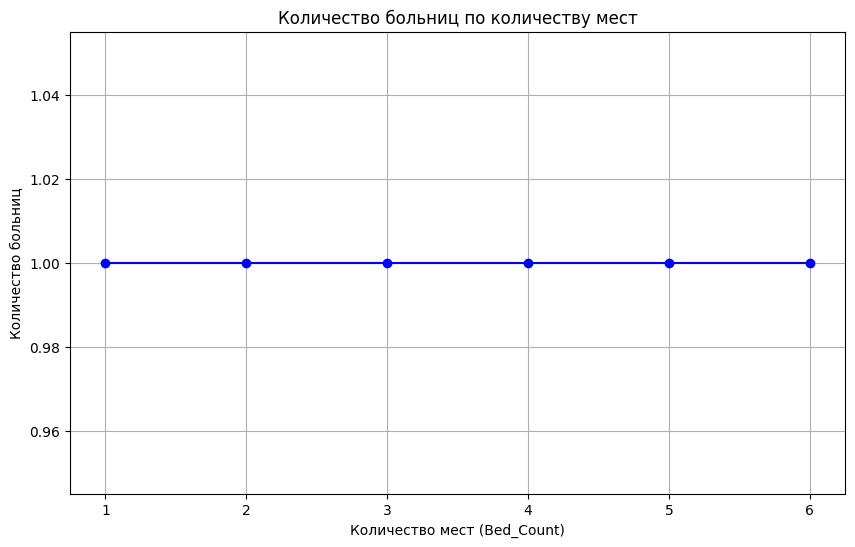

Соединение с PostgreSQL закрыто


In [16]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(
        user="postgres",
        password="1",
        host="localhost",
        port="5432",
        database=database_name
    )
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключаемся к базе данных medical
    database_name = 'medical'
    connection = get_connection(database_name)
    cursor = connection.cursor()

    # SQL-запрос для подсчета количества больниц по количеству мест
    query = """
    SELECT Bed_Count, COUNT(*) AS Hospital_Count
    FROM Hospital1
    GROUP BY Bed_Count
    ORDER BY Bed_Count;
    """
    cursor.execute(query)

    # Получаем результат запроса
    result = cursor.fetchall()

    # Преобразуем результат в DataFrame
    df = pd.DataFrame(result, columns=["Bed_Count", "Hospital_Count"])

    # Закрываем подключение к базе данных
    close_connection(connection)

    # Построение линейного графика
    plt.figure(figsize=(10, 6))
    plt.plot(df["Bed_Count"], df["Hospital_Count"], marker='o', linestyle='-', color='b')
    plt.title("Количество больниц по количеству мест")
    plt.xlabel("Количество мест (Bed_Count)")
    plt.ylabel("Количество больниц")
    plt.grid(True)
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if 'connection' in locals() and connection:
        close_connection(connection)